<div style="text-align:center;">
    <h1>Événement : IndabaX TOGO 2023</h1>
    <img src="https://lh3.googleusercontent.com/niJPpVH0EivPsgHLR0_vGWOG-TUcDX6sgK-lvLMHf-Gx-UmZswP_7N2_PN5EB1PwFYpe9sI8bqcUVy6KBofNHMRHpKRfT4XRnCuqzaacMYbj_nQdj-2n9muoF7nFOV1GhQ=w663" alt="Image">

    <h2>Thème : LA DATA UNE MINE D'OR POUR AIDER À LA PRISE DE DÉCISIONS ÉCLAIRÉES</h2>
    <h3>Présentateur : KAMDA Anah-essodé</h3>

    <h1>Web-Scraping-Project-Togo-Immobilier-Data</h1>
    <img src="https://norsecorp.com/wp-content/uploads/2020/06/001-efficient-web-scraping.png" alt="Web Scraping Image">

    <h2>Aperçu</h2>
    <p>Dans ce projet, j'ai extrait des données sur l'immobilier au Togo en utilisant Python et Beautiful Soup. L'objectif était de collecter des informations sur les annonces faites sur ce site, concernant le domaine de l'immobilier.</p>

    <h2>Prérequis</h2>
    <p>Pour exécuter ce script, vous devrez avoir Python 3 et les packages suivants installés :</p>
    <ul>
        <li>requests</li>
        <li>BeautifulSoup</li>
    </ul>

    <h2>Instructions</h2>
    <ol>
        <li></li>
        <li></li>
        <li></li>
        <li></li>
    </ol>

    <h2>Data Description</h2>
    <p>Catégorie de l'annonce : Les annonces sont classées dans différentes catégories telles que "Appartements meublés", "Terrains", "Villas".</p>
    <p>Lien vers la catégorie : Chaque catégorie a un lien associé.</p>
    <p>Titre de l'annonce : Chaque annonce a un titre qui décrit brièvement ce qui est proposé.</p>
    <p>Prix de l'annonce : Le prix associé à chaque annonce.</p>
    <p>Emplacement de l'annonce : L'emplacement géographique de l'annonce, généralement indiqué par une ville ou une région.</p>

    <h2>Data Cleaning</h2>
    <p>Les données extraites peuvent contenir des erreurs ou des incohérences, et un nettoyage ultérieur peut être nécessaire en fonction de l'analyse ou du cas d'utilisation spécifique.</p>

    <h2>Credits</h2>
    <p><a href="www.linkedin.com/in/kamda-anah-essodé-081093226">KAMDA anah-essodé</a></p>

    <h2>References</h2>
    <ul>
        <li><a href="https://tg.coinafrique.com/categorie/immobilier#?page={}">COIN AFRIQUE website</a></li>
        <li><a href="https://www.python.org/">Python</a></li>
        <li><a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">BeautifulSoup</a></li>
    </ul>
</div>





#Qu’est-ce que le Web Scraping ?
Le sens du mot « Scrapping » dans le dictionnaire implique d’obtenir quelque chose sur le Web. Ici, deux questions se posent : ce que nous pouvons obtenir du Web et comment l’obtenir.

La réponse à la première question est « données ». Les données sont indispensables pour tout programmeur et l’exigence de base de tout projet de programmation est la grande quantité de données utiles.

La réponse à la deuxième question est un peu délicate, car il existe de nombreuses façons d’obtenir des données.

#Composants d’un Web Scraper
Un web scraper se compose des composants suivants :

##Module de robot d’indexation Web
Un composant très nécessaire du web scraper, le module de robot d’indexation, est utilisé pour naviguer sur le site web cible en effectuant une requête HTTP ou HTTPS vers les URLs. Le robot d’exploration télécharge les données non structurées (contenu HTML) et les transmet à extractor, le module suivant.

##Extracteur
L’extracteur traite le contenu HTML récupéré et extrait les données dans un format semi-structuré. Il est également appelé module d’analyse syntaxique et utilise différentes techniques d’analyse comme l’expression régulière, l’analyse HTML, l’analyse DOM ou l’intelligence artificielle pour son fonctionnement.

##Module de transformation et de nettoyage des données
Les données extraites ci-dessus ne sont pas adaptées à une utilisation immédiate. Il doit passer par un module de nettoyage pour que nous puissions l’utiliser. Des méthodes telles que la manipulation de chaînes de caractères ou l’expression régulière peuvent être utilisées à cette fin. Notez que l’extraction et la transformation peuvent également être effectuées en une seule étape.

##Module de stockage
Après avoir extrait les données, nous devons les stocker selon nos besoins. Le module de stockage produira les données dans un format standard qui peut être stocké dans une base de données ou au format JSON ou CSV.

##1. Importation des bibliothèques :

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


##2. Création des listes vides pour stocker les données



In [ ]:
Category_Name = []
Category_Link = []
Ad_Title = []
Ad_Price = []
Ad_Location = []


##3. Définition des villes et du nombre de pages à parcourir pour chaque ville :

In [ ]:
cities = ["lome", "sokode", "kara", "kpalime"]
num_pages = 20


##3. Définition de l'en-tête User-Agent

In [ ]:

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}


In [ ]:
# Boucle pour parcourir les villes
for city in cities:
    for j in range(1, num_pages + 1):
        # Construire l'URL avec le numéro de page et la ville
        url = f"https://tg.coinafrique.com/ville/{city}/immobilier?page={j}"

        # Faire la requête au site
        webpage = requests.get(url, headers=headers).text

        # Créer un objet BeautifulSoup
        soup = BeautifulSoup(webpage, 'html.parser')

        # Extraire des informations sur les catégories
        categories = soup.find_all("li", class_="category gtm-sous-category center")

        for category in categories:
            category_name = category.find("div", class_="title-box").text.strip()
            category_link = category.find("a")["href"]

            Category_Name.append(category_name)
            Category_Link.append(category_link)

        # Extraire des informations sur les annonces en vedette
        top_ads = soup.find_all("div", class_="card-content ad__card-content")

        for ad in top_ads:
            try:
                ad_title = ad.find("p", class_="ad__card-description").text.strip()
                ad_price = ad.find("p", class_="ad__card-price").text.strip()  # En supposant que le prix est au début du titre
                ad_location = ad.find("p", class_="ad__card-location").text.strip()


                Ad_Title.append(ad_title)
                Ad_Price.append(ad_price)
                Ad_Location.append(ad_location)

            except Exception as e:
                print(f"Erreur lors de l'extraction d'une annonce : {e}")


##7. Création d'un dictionnaire avec les données extraites :

In [ ]:
dic = {"Category_Name": Category_Name,
       "Category_Link": Category_Link,
       "Ad_Title": Ad_Title,
       "Ad_Price": Ad_Price,
       "Ad_Location": Ad_Location}


##8. Création d'un DataFrame pour stocker les données :

In [ ]:
data = pd.DataFrame.from_dict(dic, orient="index")
data = data.T


In [ ]:
data

,Category_Name,Category_Link,Ad_Title,Ad_Price,Ad_Location
0,Villas,/categorie/villas,Location appartement 3 pièces - Baguida lome,120 000CFA,"location_onBaguida Lome, Togo"
1,Terrains,/categorie/terrains,Location villa meublée 5 pièces - Lomé,450 000CFA,"location_onBaguida Lome, Togo"
2,Appartements,/categorie/appartements,Vente villa 5 pièces - Cité Baod,150 000 000CFA,"location_onBaguida Lome, Togo"
3,Immeubles,/categorie/immeubles,Vente villa 5 piéces - Kpogan,160 000 000CFA,"location_onBaguida Lome, Togo"
4,Bureaux & Commerces,/categorie/bureaux-et-commerces,Location appartement 3 pièces meublée - Luxolin,400 000CFA,"location_onBaguida Lome, Togo"
...,...,...,...,...,...
1716,None,None,Vente maison à 2 étages,35 000 000CFA,"location_onKara, Togo"
1717,None,None,Vente terrain 5 lot(s) Kara,300 000CFA,"location_onKara, Togo"
1718,None,None,Vente terrain 1ha Kara,12 000 000CFA,"location_onKara, Togo"
1719,None,None,Vente Terrain Lot(s) Kara,500 000CFA,"location_onKara, Togo"


In [ ]:
data.to_csv('coinAfrique_data.csv', index="False")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#chargement du fichier csv enregistrer si dessus
final_data=pd.read_csv('coinAfrique_data.csv')

PREPROCESSING SUR LES DONNEES SCRAPPER

In [ ]:
#La colonne(Ad_Title) est composé de 2 entiter que je  vais separe en créant deux colonne ('zone';'description')

final_data ["zone"]=final_data ["Ad_Title"].str.split("-",n=1).str[1].str.strip()
final_data ["Description"]=final_data ["Ad_Title"].str.split("-",n=1).str[0].str.strip()

In [ ]:
final_data

,Category_Name,Category_Link,Ad_Title,Ad_Price,Ad_Location,zone,Description
0,Villas,/categorie/villas,Location appartement 3 pièces - Baguida lome,120 000CFA,"location_onBaguida Lome, Togo",Baguida lome,Location appartement 3 pièces
1,Terrains,/categorie/terrains,Location villa meublée 5 pièces - Lomé,450 000CFA,"location_onBaguida Lome, Togo",Lomé,Location villa meublée 5 pièces
2,Appartements,/categorie/appartements,Vente villa 5 pièces - Cité Baod,150 000 000CFA,"location_onBaguida Lome, Togo",Cité Baod,Vente villa 5 pièces
3,Immeubles,/categorie/immeubles,Vente villa 5 piéces - Kpogan,160 000 000CFA,"location_onBaguida Lome, Togo",Kpogan,Vente villa 5 piéces
4,Bureaux & Commerces,/categorie/bureaux-et-commerces,Location appartement 3 pièces meublée - Luxolin,400 000CFA,"location_onBaguida Lome, Togo",Luxolin,Location appartement 3 pièces meublée
...,...,...,...,...,...,...,...
1716,None,None,Vente maison à 2 étages,35 000 000CFA,"location_onKara, Togo",NaN,Vente maison à 2 étages
1717,None,None,Vente terrain 5 lot(s) Kara,300 000CFA,"location_onKara, Togo",NaN,Vente terrain 5 lot(s) Kara
1718,None,None,Vente terrain 1ha Kara,12 000 000CFA,"location_onKara, Togo",NaN,Vente terrain 1ha Kara
1719,None,None,Vente Terrain Lot(s) Kara,500 000CFA,"location_onKara, Togo",NaN,Vente Terrain Lot(s) Kara


#Visualiser les valuers nulles
Dans les graphiques ci-dessous: nous remarquons que les valeurs non nulles sont supérieures aux valeurs nulles et que certaines colonnes ne contiennent que des NAN. Supprimons des colonnes qui ne contiennent que des NAN.

<Axes: >

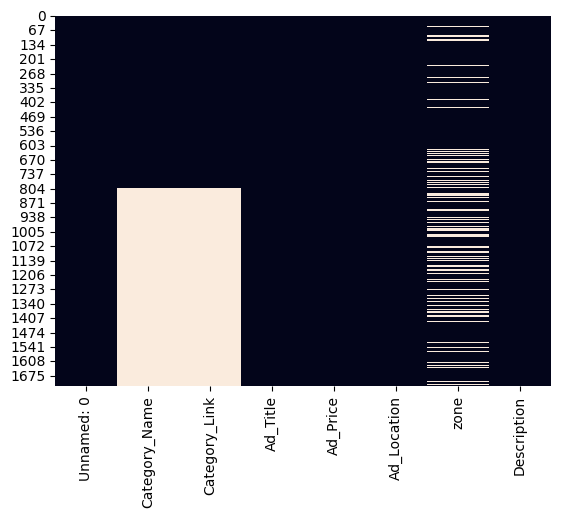

In [ ]:
import seaborn as sns
def viz_na(final_data):
    return sns.heatmap(final_data.isna(), cbar=False)

viz_na(final_data)

# on a pas beaucoup de valeur manquante, les features ont des relations en communs

In [ ]:
#missing data
def nan_description(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

nan_description(final_data)

,Total,Percent
Category_Name,921,0.535154
Category_Link,921,0.535154
zone,331,0.192330
Unnamed: 0,0,0.000000
Ad_Title,0,0.000000
Ad_Price,0,0.000000
Ad_Location,0,0.000000
Description,0,0.000000


In [ ]:
final_data = final_data.drop(["Unnamed: 0","Category_Link","Ad_Title"], axis=1 )

In [ ]:
final_data

,Category_Name,Ad_Price,Ad_Location,zone,Description
0,Villas,120 000CFA,"location_onBaguida Lome, Togo",Baguida lome,Location appartement 3 pièces
1,Terrains,450 000CFA,"location_onBaguida Lome, Togo",Lomé,Location villa meublée 5 pièces
2,Appartements,150 000 000CFA,"location_onBaguida Lome, Togo",Cité Baod,Vente villa 5 pièces
3,Immeubles,160 000 000CFA,"location_onBaguida Lome, Togo",Kpogan,Vente villa 5 piéces
4,Bureaux & Commerces,400 000CFA,"location_onBaguida Lome, Togo",Luxolin,Location appartement 3 pièces meublée
...,...,...,...,...,...
1716,NaN,35 000 000CFA,"location_onKara, Togo",NaN,Vente maison à 2 étages
1717,NaN,300 000CFA,"location_onKara, Togo",NaN,Vente terrain 5 lot(s) Kara
1718,NaN,12 000 000CFA,"location_onKara, Togo",NaN,Vente terrain 1ha Kara
1719,NaN,500 000CFA,"location_onKara, Togo",NaN,Vente Terrain Lot(s) Kara


In [ ]:
# Nettoyer la colonne de prix en supprimant le symbole 'CFA' et en convertissant en float
final_data['Ad_Price'] = pd.to_numeric(final_data['Ad_Price'].str.replace('CFA', '').str.replace(' ', ''), errors='coerce')

In [ ]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne 'Ad_Price'
final_data = final_data.dropna(subset=['Ad_Price'])

In [ ]:
final_data

,Category_Name,Ad_Price,Ad_Location,zone,Description
0,9,120000.0,1,223,177
1,7,450000.0,1,344,271
2,0,150000000.0,1,247,623
3,5,160000000.0,1,323,624
4,2,400000.0,1,372,178
...,...,...,...,...,...
1716,10,35000000.0,4,466,545
1717,10,300000.0,4,466,577
1718,10,12000000.0,4,466,565
1719,10,500000.0,4,466,427


In [ ]:
final_data.describe()

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



# Créer un DataFrame à partir des données
df = final_data

# Prétraiter les données
le = LabelEncoder()
df['Category_Name'] = le.fit_transform(df['Category_Name'])
df['Ad_Location'] = le.fit_transform(df['Ad_Location'])
df['zone'] = le.fit_transform(df['zone'])
df['Description'] = le.fit_transform(df['Description'])



<ipython-input-31-2ce8eb22e475>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category_Name'] = le.fit_transform(df['Category_Name'])
<ipython-input-31-2ce8eb22e475>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ad_Location'] = le.fit_transform(df['Ad_Location'])
<ipython-input-31-2ce8eb22e475>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
df

,Category_Name,Ad_Price,Ad_Location,zone,Description
0,9,120000.0,1,223,177
1,7,450000.0,1,344,271
2,0,150000000.0,1,247,623
3,5,160000000.0,1,323,624
4,2,400000.0,1,372,178
...,...,...,...,...,...
1716,10,35000000.0,4,466,545
1717,10,300000.0,4,466,577
1718,10,12000000.0,4,466,565
1719,10,500000.0,4,466,427


In [ ]:
# Séparer les données en fonction des caractéristiques (X) et de la cible (y)
X = df[['Category_Name', 'Ad_Location', 'zone']]
y = df['Ad_Price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 1.7338643732915222e+16


In [ ]:
# Utilisez le modèle pour prédire le prix pour de nouvelles données
new_data = pd.DataFrame({'Description': ['Location appartement 2 pîéces'], 'Ad_Location': ['ocation_onLome, Togo'], 'zone': ['Avedji']})
new_data['Description'] = le.transform(new_data['Description'])
new_data['Ad_Location'] = le.transform(new_data['Ad_Location'])
new_data['zone'] = le.transform(new_data['zone'])

prediction_new_data = model.predict(new_data)
print(f'Predicted Price for New Data: {prediction_new_data}')

##9. Enregistrement des données dans un fichier Excel :

### CODE ARCHITECTURALE POUR LE SCRAPING DE NOTRE SITE